In [1]:
# _____ ______  _____        _     _____ _   _ _____ 
#|  __ \| ___ \|  _  |      | |   |_   _| | | |  ___|
#| |  \/| |_/ /| | | |______| |     | | | | | | |__  
#| | __ | ___ \| | | |______| |     | | | | | |  __| 
#| |_\ \| |_/ /\ \_/ /      | |_____| |_\ \_/ / |___ 
# \____/\____/  \___/       \_____/\___/ \___/\____/ 
                                                    
## 20210823 - This is a script that will be used for LIVE data updates/plots at GBO during testing
## We will begin by importing the proper packages from the Drone Modules:
from dronehacks.GBO_Corr_Class import *
#from dronehacks.Drone_Class import *

ModuleNotFoundError: No module named 'dronehacks'

In [2]:
## Let's specify the DISH COORDINATES from Pranav's Email:
    # 1. Want to initialize with additional receiver/array variables in dimensioned arrays:
            ##############################################################################################
            # I  Variable      # Dimension # description
            ##############################################################################################
            # A. Keys          # n dishes  # (string with name or channel index?)
            # B. Coordinates   # n by 3vec # (Vector position in local cartesian (E,N,U) relative origin)
            # C. Pointings     # n by 3vec # (Unit Vector in local cartesian (E,N,U))
            # D. Polarizations # n by 3vec # (Unit Vector in local cartesian (E,N,U))
            ##############################################################################################
    # 2. Want to calculate drone coordinates on per-dish basis, for xyz and rpt from origin based arrays

## Key, Position, Channel, Polarization, Pointing Variable Notes:

## 8 Dish 16Channel Array Configuration for the 6m Array at GBO:
# Dish 0:  [0, 1], (0.0, 0.0, 0.0)
# Dish 7:  [3, 2], (-24.215395745765452, -12.605737141316427, 0.0)
# Dish 2:  [4, 5], (-8.403824760877617, 16.143597163843634, 0.0)
# Dish 3:  [7, 6], (-8.071798581921817, -4.2019123804388085, 0.0)
# Dish 4:  [9, 8], (-12.273710962360624, 3.869886201483008, 0.0)
# Dish 5:  [10, 11], (-16.475623342799434, 11.941684783404824, 0.0))
# Dish 6:  [12, 13], (-20.345509544282443, -0.33202617895580033, 0.0) # CHIME FEED
# Dish 8:  [14, 15], (-28.41730812620426, -4.53393855939461, 0.0)

## 4Dish 8Channel Array Configuration for the 6m Array at GBO:
# Dish 0:  [0, 1], (0.0, 0.0, 0.0)
# Dish 7:  [3, 2], (-24.215395745765452, -12.605737141316427, 0.0)
# Dish 2:  [4, 5], (-8.403824760877617, 16.143597163843634, 0.0)
# Dish 3:  [7, 6], (-8.071798581921817, -4.2019123804388085, 0.0)

## Key, Position, Channel, Polarization, Pointing Variable Assignment:
## RECEIVER INFORMATION is needed to initialize the geometric environments: ##
## Must include some 'key' strings for labelling/identifying receivers: [Pranav's Conventions]
Array_Keys=["Dish_0","Dish_7","Dish_2","Dish_3","Dish_4","Dish_5","Dish_6","Dish_8"]
## Specify Coordinate Origin: #810m about MSL
#GBO_HIRAX_DISH_0=pygeodesy.ellipsoidalNvector.LatLon(38.429280, -79.844990, 810).to3llh()
## Must Specify Coordinates and Pointings of receivers in Local Cartesian in an array of shape: n_receivers x 3 ##
Array_Coords=np.array([[0.0, 0.0, 0.0], # "Dish_0" \
                       [-24.215395745765452, -12.605737141316427, 0.0], # "Dish_7" \
                       [-8.403824760877617, 16.143597163843634, 0.0], # "Dish_2" \
                       [-8.071798581921817, -4.2019123804388085, 0.0], # "Dish_3" \
                       [-12.273710962360624, 3.869886201483008, 0.0], # "Dish_4" \
                       [-16.475623342799434, 11.941684783404824, 0.0], # "Dish_5" \
                       [-20.345509544282443, -0.33202617895580033, 0.0], # "Dish_6" \
                       [-28.41730812620426, -4.53393855939461, 0.0]]) # "Dish_8" \
## If pointings are defined by vectors in Local Coordinates (E,N,U) use:
Array_Pointings=np.array([[0,0,1], # +Z (up) in LC \
                          [0,0,1],\
                          [0,0,1],\
                          [0,0,1],\
                          [0,0,1],\
                          [0,0,1],\
                          [0,0,1],\
                          [0,0,1]])
## Define Array Polarizations (2 per dish) in Local Cartesian E,N,U:
Array_Pols=np.array([[[1,0,0],[0,1,0]], # E,N \
                     [[1,0,0],[0,1,0]], \
                     [[1,0,0],[0,1,0]], \
                     [[1,0,0],[0,1,0]], \
                     [[1,0,0],[0,1,0]], \
                     [[1,0,0],[0,1,0]], \
                     [[1,0,0],[0,1,0]], \
                     [[1,0,0],[0,1,0]]])

## 2 DISH PLOTTING:
GBO2_chmap=[0,1]
GBO2_automap=np.array([0,2])
## 4 DISH PLOTTING:
GBO4_chmap=np.array([0,1,3,2,4,5,7,6])
GBO4_automap=np.array([ 0,  8, 21, 15, 26, 30, 35, 33])
## 8 DISH PLOTTING:
GBO8_chmap=np.array([0,1,3,2,4,5,7,6,9,8,10,11,12,13,14,15])
GBO8_automap=np.array([0,  16,  45,  31,  58,  70,  91,  81, 108, 100, 115, 121, 126, 130, 133, 135])

In [3]:
## Thursday Flights -- 20211021 -- data acquisition with Pranav's laptop

## Test 1) first test acquisition, just a sky measurement, then plugging in RTK: BADNESS at 750MHz as seen on SpecAn
gaindir='/media/wvurail/ssd_a/TONE_ACQ/digital_gains/20211021T123840Z_yale_drone_yale_digitalgain//'
datadir='/media/wvurail/ssd_a/TONE_ACQ/20211021T123840Z_yale_drone/corr/20211021T123853Z/'
#DJIRTKRFI=Corr_Data(n_channels=2,chmap=GBO8_chmap,Data_Directory=datadir,Working_Directory='/home/wvurail/',Gain_Directory=gaindir)
#imshow(DJIRTKRFI.V_full[3000:3300:1,-1:500:-1,0],extent=[DJIRTKRFI.freq[-1],DJIRTKRFI.freq[500],1000,0],aspect='auto')

## Test 2) generator restart, try data acquisition again to see if FPGAs have same IPA
gaindir='/media/wvurail/ssd_a/TONE_ACQ/digital_gains/20211021T131031Z_yale_drone_yale_digitalgain/'
datadir='/media/wvurail/ssd_a/TONE_ACQ/20211021T131031Z_yale_drone/corr/20211021T131113Z/'
#test=Corr_Data(n_channels=2,chmap=GBO8_chmap,Data_Directory=datadir,Working_Directory='/home/wvurail/',Gain_Directory=gaindir)

## Test 3) all filters in place: dish 2 has no signal? check power and reassess?
gaindir='/media/wvurail/ssd_a/TONE_ACQ/digital_gains/20211021T132658Z_yale_drone_yale_digitalgain/'
datadir='/media/wvurail/ssd_a/TONE_ACQ/20211021T132658Z_yale_drone/corr/20211021T132710Z/'
#test=Corr_Data(n_channels=16,chmap=GBO8_chmap,Data_File_Index=[0],Data_Directory=datadir,Working_Directory='/home/wvurail/',Gain_Directory=gaindir)

# Flight 1) cross/copol stuff: dish 2 has no signal still, some oscillation after most of the flight was good?
gaindir='/media/wvurail/ssd_a/TONE_ACQ/digital_gains/20211021T135105Z_yale_drone_yale_digitalgain/'
datadir='/media/wvurail/ssd_a/TONE_ACQ/20211021T135105Z_yale_drone/corr/20211021T135147Z/'
#test=Corr_Data(n_channels=4,chmap=GBO8_chmap,Data_File_Index=range(18,40),Data_Directory=datadir,Working_Directory='/home/wvurail/',Gain_Directory=gaindir)

# Test 4) pranav disconnected the bad dish, some RFI environment troubles? 
gaindir='/media/wvurail/ssd_a/TONE_ACQ/digital_gains/20211021T143758Z_yale_drone_yale_digitalgain/'
datadir='/media/wvurail/ssd_a/TONE_ACQ/20211021T143758Z_yale_drone/corr/20211021T143840Z/'
#test=Corr_Data(n_channels=6,chmap=GBO8_chmap,Data_Directory=datadir,Working_Directory='/home/wvurail/',Gain_Directory=gaindir)

# Flight 2) attempting a beammapping grid flight: LOOKS GOOD!
gaindir='/media/wvurail/ssd_a/TONE_ACQ/digital_gains/20211021T144905Z_yale_drone_yale_digitalgain/'
datadir='/media/wvurail/ssd_a/TONE_ACQ/20211021T144905Z_yale_drone/corr/20211021T144917Z/'
#test=Corr_Data(n_channels=4,chmap=GBO8_chmap,Data_Directory=datadir,Working_Directory='/home/wvurail/',Gain_Directory=gaindir)

# Flight 3) attempting a beammapping grid flight
gaindir='/media/wvurail/ssd_a/TONE_ACQ/digital_gains/20211021T151650Z_yale_drone_yale_digitalgain/'
datadir='/media/wvurail/ssd_a/TONE_ACQ/20211021T151650Z_yale_drone/corr/20211021T151703Z/'
#test=Corr_Data(n_channels=2,chmap=GBO8_chmap,Data_Directory=datadir,Working_Directory='/home/wvurail/',Gain_Directory=gaindir)

# Flight 4) attempting a beammapping grid flight
gaindir='/media/wvurail/ssd_a/TONE_ACQ/digital_gains/20211021T161500Z_yale_drone_yale_digitalgain/'
datadir='/media/wvurail/ssd_a/TONE_ACQ/20211021T161500Z_yale_drone/corr/20211021T161512Z/'
#test=Corr_Data(n_channels=2,chmap=GBO8_chmap,Data_Directory=datadir,Working_Directory='/home/wvurail/',Gain_Directory=gaindir)

# Flight 5) attempting a beammapping grid flight: ssd_b #`
gaindir='/media/wvurail/ssd_b/TONE_ACQ/digital_gains/20211021T164739Z_yale_drone_yale_digitalgain/'
datadir='/media/wvurail/ssd_b/TONE_ACQ/20211021T164739Z_yale_drone/corr/20211021T164751Z/'
#test=Corr_Data(n_channels=4,chmap=GBO8_chmap,Data_Directory=datadir,Working_Directory='/home/wvurail/',Gain_Directory=gaindir)

# Flight 6) attempting a beammapping grid flight: ssd_b #2
gaindir='/media/wvurail/ssd_b/TONE_ACQ/digital_gains/20211021T183430Z_yale_drone_yale_digitalgain/'
datadir='/media/wvurail/ssd_b/TONE_ACQ/20211021T183430Z_yale_drone/corr/20211021T183443Z/'
#test=Corr_Data(n_channels=4,chmap=GBO8_chmap,Data_Directory=datadir,Working_Directory='/home/wvurail/',Gain_Directory=gaindir)

# Flight 7) attempting a beammapping grid flight: ssd_b #3
gaindir='/media/wvurail/ssd_b/TONE_ACQ/digital_gains/20211021T185805Z_yale_drone_yale_digitalgain/'
datadir='/media/wvurail/ssd_b/TONE_ACQ/20211021T185805Z_yale_drone/corr/20211021T185818Z/'
#test=Corr_Data(n_channels=4,chmap=GBO8_chmap,Data_Directory=datadir,Working_Directory='/home/wvurail/',Gain_Directory=gaindir)

# Flight 8) attempting a beammapping grid flight: ssd_b #4
gaindir='/media/wvurail/ssd_b/TONE_ACQ/digital_gains/20211021T192212Z_yale_drone_yale_digitalgain/'
datadir='/media/wvurail/ssd_b/TONE_ACQ/20211021T192212Z_yale_drone/corr/20211021T192225Z/'
#test=Corr_Data(n_channels=4,chmap=GBO8_chmap,Data_Directory=datadir,Working_Directory='/home/wvurail/',Gain_Directory=gaindir)

# Test 5) aborted flight due to rain: ssd_b #5
gaindir='/media/wvurail/ssd_b/TONE_ACQ/digital_gains/20211021T194316Z_yale_drone_yale_digitalgain/'
datadir='/media/wvurail/ssd_b/TONE_ACQ/20211021T194316Z_yale_drone/corr/20211021T194328Z/'
#test=Corr_Data(n_channels=4,chmap=GBO8_chmap,Data_Directory=datadir,Working_Directory='/home/wvurail/',Gain_Directory=gaindir)

# Flight 9) attempting a beammapping grid flight: ssd_b #6
gaindir='/media/wvurail/ssd_b/TONE_ACQ/digital_gains/20211021T203206Z_yale_drone_yale_digitalgain/'
datadir='/media/wvurail/ssd_b/TONE_ACQ/20211021T203206Z_yale_drone/corr/20211021T203219Z/'
#test=Corr_Data(n_channels=4,chmap=GBO8_chmap,Data_Directory=datadir,Working_Directory='/home/wvurail/',Gain_Directory=gaindir)

# Flight 10) attempting a beammapping grid flight: ssd_b #7
gaindir='/media/wvurail/ssd_b/TONE_ACQ/digital_gains/20211021T205659Z_yale_drone_yale_digitalgain/'
datadir='/media/wvurail/ssd_b/TONE_ACQ/20211021T205659Z_yale_drone/corr/20211021T205711Z/'
#test=Corr_Data(n_channels=4,chmap=GBO8_chmap,Data_Directory=datadir,Working_Directory='/home/wvurail/',Gain_Directory=gaindir)

# Flight 11) reduced attenuation sidelobe grid flight: ssd_b #8
gaindir='/media/wvurail/ssd_b/TONE_ACQ/digital_gains/20211021T214028Z_yale_drone_yale_digitalgain/'
datadir='/media/wvurail/ssd_b/TONE_ACQ/20211021T214028Z_yale_drone/corr/20211021T214040Z/'
#test=Corr_Data(n_channels=4,chmap=GBO8_chmap,Data_Directory=datadir,Working_Directory='/home/wvurail/',Gain_Directory=gaindir)

# Flight 12) attempting a crosspol test flight: ssd_b #7
gaindir='/media/wvurail/ssd_b/TONE_ACQ/digital_gains/20211021T220644Z_yale_drone_yale_digitalgain/'
datadir='/media/wvurail/ssd_b/TONE_ACQ/20211021T220644Z_yale_drone/corr/20211021T220657Z/'
#test=Corr_Data(n_channels=4,chmap=GBO8_chmap,Data_Directory=datadir,Working_Directory='/home/wvurail/',Gain_Directory=gaindir)

In [57]:
## Friday Flights -- 20211022 -- data acquisition with Pranav's laptop

## Test 1) - [ssd_a 1] - first test acquisition, just a sky measurement, things look nice and quiet
gaindir='/media/wvurail/ssd_a/TONE_ACQ/digital_gains/20211022T120130Z_yale_drone_yale_digitalgain/'
datadir='/media/wvurail/ssd_a/TONE_ACQ/20211022T120130Z_yale_drone/corr/20211022T120212Z/'
#test=Corr_Data(n_channels=16,chmap=GBO8_chmap,Data_Directory=datadir,Working_Directory='/home/wvurail/',Gain_Directory=gaindir)

## Test 2) - [ssd_a 2] - first test acquisition, just a sky measurement, things look nice and quiet
gaindir='/media/wvurail/ssd_a/TONE_ACQ/digital_gains/20211022T121034Z_yale_drone_yale_digitalgain/'
datadir='/media/wvurail/ssd_a/TONE_ACQ/20211022T121034Z_yale_drone/corr/20211022T121047Z/'
#test=Corr_Data(n_channels=4,chmap=GBO8_chmap,Data_Directory=datadir,Working_Directory='/home/wvurail/',Gain_Directory=gaindir)

## Flight 1) - [ssd_a 3] - first test acquisition, just a sky measurement, maybe a crosspol dip?
gaindir='/media/wvurail/ssd_a/TONE_ACQ/digital_gains/20211022T122457Z_yale_drone_yale_digitalgain/'
datadir='/media/wvurail/ssd_a/TONE_ACQ/20211022T122457Z_yale_drone/corr/20211022T122539Z/'
#test=Corr_Data(n_channels=2,chmap=GBO8_chmap,Data_Directory=datadir,Working_Directory='/home/wvurail/',Gain_Directory=gaindir)

## Flight 2) - [ssd_a 4] - another crosspol flight at 36dBatten
gaindir='/media/wvurail/ssd_a/TONE_ACQ/digital_gains/20211022T125439Z_yale_drone_yale_digitalgain/'
datadir='/media/wvurail/ssd_a/TONE_ACQ/20211022T125439Z_yale_drone/corr/20211022T125451Z/'
#test=Corr_Data(n_channels=2,chmap=GBO8_chmap,Data_Directory=datadir,Working_Directory='/home/wvurail/',Gain_Directory=gaindir)

## Flight 3) - [ssd_a 5] - flying crosspol at 30dB atten - definitely some crosspol features at low f
gaindir='/media/wvurail/ssd_a/TONE_ACQ/digital_gains/20211022T133015Z_yale_drone_yale_digitalgain/'
datadir='/media/wvurail/ssd_a/TONE_ACQ/20211022T133015Z_yale_drone/corr/20211022T133027Z/'
#test=Corr_Data(n_channels=2,chmap=GBO8_chmap,Data_Directory=datadir,Working_Directory='/home/wvurail/',Gain_Directory=gaindir)

## Flight 4) - [ssd_a 6] - flying crosspol at 30dB atten - crosspol is certainly less apparent here
gaindir='/media/wvurail/ssd_a/TONE_ACQ/digital_gains/20211022T140227Z_yale_drone_yale_digitalgain//'
datadir='/media/wvurail/ssd_a/TONE_ACQ/20211022T140227Z_yale_drone/corr/20211022T140239Z/'
#test=Corr_Data(n_channels=2,chmap=GBO8_chmap,Data_Directory=datadir,Working_Directory='/home/wvurail/',Gain_Directory=gaindir)

## Flight 5) - [ssd_a 7] - flying crosspol at 30dB atten: JET FIGHTER RFI??? not much evidence of crosspol dips?
gaindir='/media/wvurail/ssd_a/TONE_ACQ/digital_gains/20211022T142848Z_yale_drone_yale_digitalgain/'
datadir='/media/wvurail/ssd_a/TONE_ACQ/20211022T142848Z_yale_drone/corr/20211022T142900Z/'
#test=Corr_Data(n_channels=2,chmap=GBO8_chmap,Data_Directory=datadir,Working_Directory='/home/wvurail/',Gain_Directory=gaindir)

## Flight 6) - [ssd_a 8] - flying crosspol at 30dB atten: more jet fighter RFI again... no obvious xpol either
gaindir='/media/wvurail/ssd_a/TONE_ACQ/digital_gains/20211022T144626Z_yale_drone_yale_digitalgain/'
datadir='/media/wvurail/ssd_a/TONE_ACQ/20211022T144626Z_yale_drone/corr/20211022T144639Z/'
#test=Corr_Data(n_channels=2,chmap=GBO8_chmap,Data_Directory=datadir,Working_Directory='/home/wvurail/',Gain_Directory=gaindir)

## Test 3) - [ssd_a 9] - deliberately looking for jet RFI signals... no jets flew lol
gaindir='/media/wvurail/ssd_a/TONE_ACQ/digital_gains/20211022T151851Z_yale_drone_yale_digitalgain//'
datadir='/media/wvurail/ssd_a/TONE_ACQ/20211022T151851Z_yale_drone/corr/20211022T151904Z/'
#test=Corr_Data(n_channels=2,chmap=GBO8_chmap,Data_Directory=datadir,Working_Directory='/home/wvurail/',Gain_Directory=gaindir)

## Test 4) - [ssd_a 10] - flying crosspol at 30dB atten: the fuckin jets came back so we landed asap... not useful
gaindir='/media/wvurail/ssd_a/TONE_ACQ/digital_gains/20211022T152617Z_yale_drone_yale_digitalgain//'
datadir='/media/wvurail/ssd_a/TONE_ACQ/20211022T152617Z_yale_drone/corr/20211022T152630Z/'
#test=Corr_Data(n_channels=2,chmap=GBO8_chmap,Data_Directory=datadir,Working_Directory='/home/wvurail/',Gain_Directory=gaindir)

## Test 5) - [ssd_a 11] - trying to see if the re-instrumented feed on dish 2 looks ok (it does)
gaindir='/media/wvurail/ssd_a/TONE_ACQ/digital_gains/20211022T161446Z_yale_drone_yale_digitalgain/'
datadir='/media/wvurail/ssd_a/TONE_ACQ/20211022T161446Z_yale_drone/corr/20211022T161459Z/'
#test=Corr_Data(n_channels=6,chmap=GBO8_chmap,Data_Directory=datadir,Working_Directory='/home/wvurail/',Gain_Directory=gaindir)

## Flight 7) - [ssd_a 12] - flying crosspol at 30dB atten: 215 deg yaw grid (expecting to see the chan0 crosspol)
gaindir='/media/wvurail/ssd_a/TONE_ACQ/digital_gains/20211022T170618Z_yale_drone_yale_digitalgain/'
datadir='/media/wvurail/ssd_a/TONE_ACQ/20211022T170618Z_yale_drone/corr/20211022T170631Z/'
#test=Corr_Data(n_channels=2,chmap=GBO8_chmap,Data_Directory=datadir,Working_Directory='/home/wvurail/',Gain_Directory=gaindir)

## Flight 8) - [ssd_a 13] - flying crosspol at 30dB atten:
gaindir='/media/wvurail/ssd_a/TONE_ACQ/digital_gains/20211022T173646Z_yale_drone_yale_digitalgain/'
datadir='/media/wvurail/ssd_a/TONE_ACQ/20211022T173646Z_yale_drone/corr/20211022T173659Z/'
#test=Corr_Data(n_channels=2,chmap=GBO8_chmap,Data_Directory=datadir,Working_Directory='/home/wvurail/',Gain_Directory=gaindir)

## Flight 9) - [ssd_a 14] - flying crosspol at 30dB atten: the fuckin jets came back so we landed asap... not useful
gaindir='/media/wvurail/ssd_a/TONE_ACQ/digital_gains/20211022T180044Z_yale_drone_yale_digitalgain/'
datadir='/media/wvurail/ssd_a/TONE_ACQ/20211022T180044Z_yale_drone/corr/20211022T180056Z/'
#test=Corr_Data(n_channels=2,chmap=GBO8_chmap,Data_Directory=datadir,Working_Directory='/home/wvurail/',Gain_Directory=gaindir)

## Flight 10) - [ssd_a 15] - flying big grid 1 for sidelobes
gaindir='/media/wvurail/ssd_a/TONE_ACQ/digital_gains/20211022T183659Z_yale_drone_yale_digitalgain/'
datadir='/media/wvurail/ssd_a/TONE_ACQ/20211022T183659Z_yale_drone/corr/20211022T183713Z/'
#test=Corr_Data(n_channels=2,chmap=GBO8_chmap,Data_Directory=datadir,Working_Directory='/home/wvurail/',Gain_Directory=gaindir)

## Flight 11) - [ssd_a 16] - flying big grid 2 for sidelobes
gaindir='/media/wvurail/ssd_a/TONE_ACQ/digital_gains/20211022T185749Z_yale_drone_yale_digitalgain/'
datadir='/media/wvurail/ssd_a/TONE_ACQ/20211022T185749Z_yale_drone/corr/20211022T185801Z/'
#test=Corr_Data(n_channels=2,chmap=GBO8_chmap,Data_Directory=datadir,Working_Directory='/home/wvurail/',Gain_Directory=gaindir)

## Flight 12) - [ssd_a 17] - flying big grid 3 for sidelobes
gaindir='/media/wvurail/ssd_a/TONE_ACQ/digital_gains/20211022T191922Z_yale_drone_yale_digitalgain/'
datadir='/media/wvurail/ssd_a/TONE_ACQ/20211022T191922Z_yale_drone/corr/20211022T191934Z/'
#test=Corr_Data(n_channels=2,chmap=GBO8_chmap,Data_Directory=datadir,Working_Directory='/home/wvurail/',Gain_Directory=gaindir)

## Flight 13) - [ssd_a 18] - flying big grid 4 for sidelobes
gaindir='/media/wvurail/ssd_a/TONE_ACQ/digital_gains/20211022T194308Z_yale_drone_yale_digitalgain/'
datadir='/media/wvurail/ssd_a/TONE_ACQ/20211022T194308Z_yale_drone/corr/20211022T194320Z/'
#test=Corr_Data(n_channels=2,chmap=GBO8_chmap,Data_Directory=datadir,Working_Directory='/home/wvurail/',Gain_Directory=gaindir)

## Flight 14) - [ssd_a 19] - flying NF crosses for 8 channels: ~25m (nothing looks very clear)
gaindir='/media/wvurail/ssd_a/TONE_ACQ/digital_gains/20211022T201219Z_yale_drone_yale_digitalgain/'
datadir='/media/wvurail/ssd_a/TONE_ACQ/20211022T201219Z_yale_drone/corr/20211022T201231Z/'
#test=Corr_Data(n_channels=2,chmap=GBO8_chmap,Data_Directory=datadir,Working_Directory='/home/wvurail/',Gain_Directory=gaindir)

## Test 6) - [ssd_a 20] - started data too soon before NF flight
gaindir='/media/wvurail/ssd_a/TONE_ACQ/digital_gains/20211022T204907Z_yale_drone_yale_digitalgain/'
datadir='/media/wvurail/ssd_a/TONE_ACQ/20211022T204907Z_yale_drone/corr/20211022T204920Z/'
#test=Corr_Data(n_channels=2,chmap=GBO8_chmap,Data_Directory=datadir,Working_Directory='/home/wvurail/',Gain_Directory=gaindir)

## Flight 15) - [ssd_a 21] - flying NF crosses for 8 channels: ~50m (trying here) dropped 7dB atten [much better!]
gaindir='/media/wvurail/ssd_a/TONE_ACQ/digital_gains/20211022T205811Z_yale_drone_yale_digitalgain/'
datadir='/media/wvurail/ssd_a/TONE_ACQ/20211022T205811Z_yale_drone/corr/20211022T205824Z/'
#test=Corr_Data(n_channels=2,chmap=GBO8_chmap,Data_Directory=datadir,Working_Directory='/home/wvurail/',Gain_Directory=gaindir)

## Test 7) - [ssd_a 22] - data crashed
gaindir='/media/wvurail/ssd_a/TONE_ACQ/digital_gains/20211022T211846Z_yale_drone_yale_digitalgain/'
datadir='/media/wvurail/ssd_a/TONE_ACQ/20211022T211846Z_yale_drone/corr/20211022T211859Z/'
#test=Corr_Data(n_channels=2,chmap=GBO8_chmap,Data_Directory=datadir,Working_Directory='/home/wvurail/',Gain_Directory=gaindir)

## Flight 16) - [ssd_a 23] - flying NF crosses for 8 channels: ~50m (trying here) dropped 7dB atten [other pol]
gaindir='/media/wvurail/ssd_a/TONE_ACQ/digital_gains/20211022T212230Z_yale_drone_yale_digitalgain/'
datadir='/media/wvurail/ssd_a/TONE_ACQ/20211022T212230Z_yale_drone/corr/20211022T212242Z/'
#test=Corr_Data(n_channels=2,chmap=GBO8_chmap,Data_Directory=datadir,Working_Directory='/home/wvurail/',Gain_Directory=gaindir)

## Test 8) - [ssd_b 1] - trying 16ch acquisition on ssd_b: TOTALLY GOT A JET in 50s of data on all channels lmao
gaindir='/media/wvurail/ssd_b/TONE_ACQ/digital_gains/20211022T214204Z_yale_drone_yale_digitalgain/'
datadir='/media/wvurail/ssd_b/TONE_ACQ/20211022T214204Z_yale_drone/corr/20211022T214217Z/'
#test=Corr_Data(n_channels=16,chmap=GBO8_chmap,Data_Directory=datadir,Working_Directory='/home/wvurail/',Gain_Directory=gaindir)

## Flight 17) - [ssd_b 2] - big grid aligned with crosspol axis for dish 0 at low atten?
gaindir='/media/wvurail/ssd_b/TONE_ACQ/digital_gains/20211022T215446Z_yale_drone_yale_digitalgain/'
datadir='/media/wvurail/ssd_b/TONE_ACQ/20211022T215446Z_yale_drone/corr/20211022T215459Z/'
#test=Corr_Data(n_channels=16,chmap=GBO8_chmap,Data_Directory=datadir,Working_Directory='/home/wvurail/',Gain_Directory=gaindir)

## Flight 18) - [ssd_b 3] - big grid aligned with crosspol axis for dish 0 at low atten?
gaindir='/media/wvurail/ssd_b/TONE_ACQ/digital_gains/20211022T221722Z_yale_drone_yale_digitalgain/'
datadir='/media/wvurail/ssd_b/TONE_ACQ/20211022T221722Z_yale_drone/corr/20211022T221734Z/'
#test=Corr_Data(n_channels=2,chmap=GBO8_chmap,Data_Directory=datadir,Working_Directory='/home/wvurail/',Gain_Directory=gaindir)


In [ ]:
test.Data_Directory

In [ ]:
plot(np.diff([(k-test.t_arr_datetime[0]).total_seconds() for k in test.t_arr_datetime[:]]),'.')
axhline(0.042)

In [ ]:
plot(test.V_full[:,900,0],'.')
plot(test.V_full[:,800,0],'.')
plot(test.V_full[:,100,0],'.')

In [ ]:
test.Plot_Auto_Corr_Waterfalls()

In [ ]:
test.Plot_Auto_Corr_Saturation_Maps()

In [ ]:
test.Plot_Auto_Corr_Time_Series(tbounds=[0,-1],freqlist=[200,400,650,800])
test.Plot_Auto_Corr_Time_Series(tbounds=[4000,4500],freqlist=[200,400,650,800])
test.Plot_Auto_Corr_Time_Series(tbounds=[12250,12750],freqlist=[200,400,650,800])


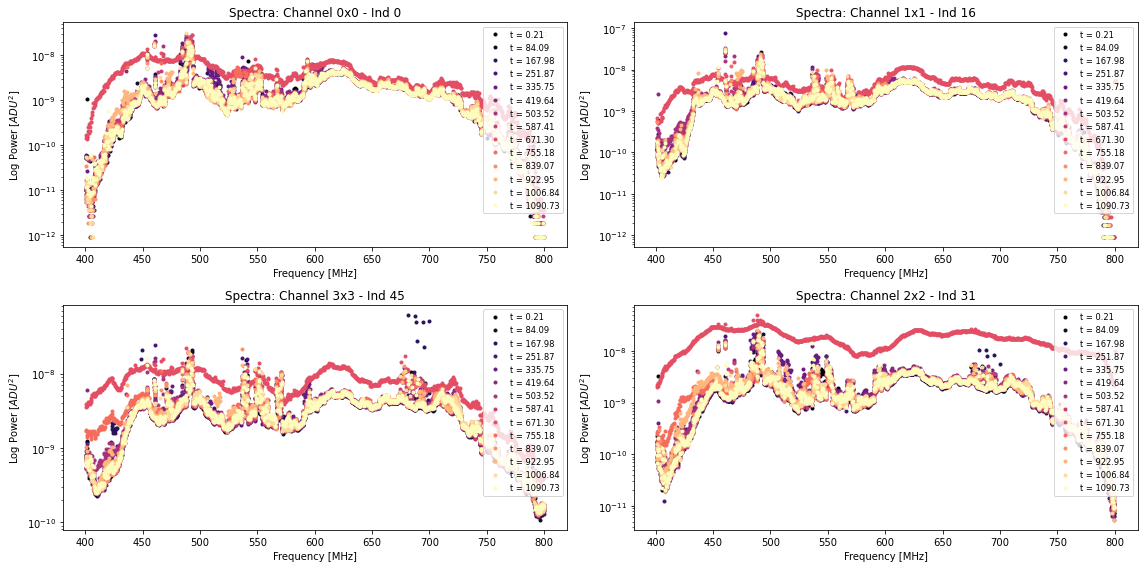

In [13]:
test.Plot_Auto_Corr_Spectra(tbounds=[5,-5],tstep=2000)

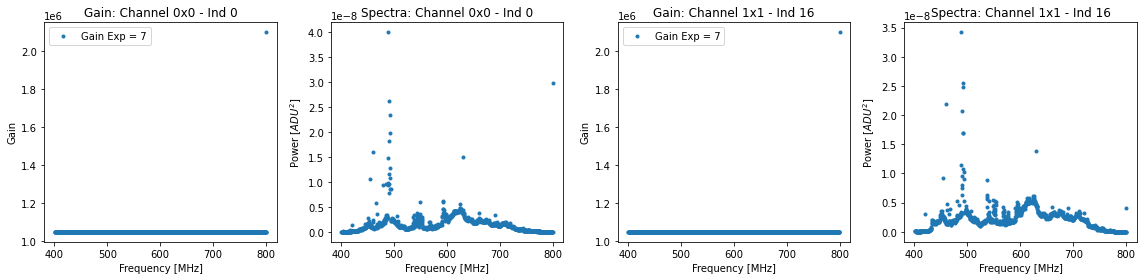

In [89]:
test.Plot_Gains_vs_Data(tind=10)

In [37]:
test.prod[test.automap]

array([(0, 0), (1, 1)], dtype=[('input_a', '<u2'), ('input_b', '<u2')])

In [ ]:
fd=h5py.File(datadir+'0084','r')
plot(fd['vis'][:][:,200,0].real)
plot(fd['vis'][:][:,400,0].real)
plot(fd['vis'][:][:,800,0].real)
plot(fd['vis'][:][:,900,0].real)
plot(fd['vis'][:][:,0,0].real)
fd.close()

In [ ]:
plot(np.diff(np.diff(fd['index_map']['time']['irigb_time'])),'.')

In [44]:
#imshow(fd['sat'][:][:,:,0].real,norm=LogNorm())

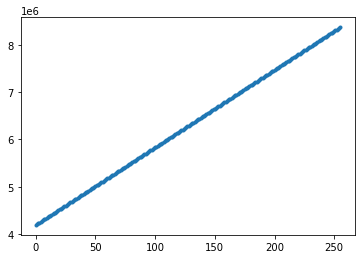

In [11]:
plot(fd['index_map']['time']['fpga_count'][:],'.')

0
7
14
21
28
35
42


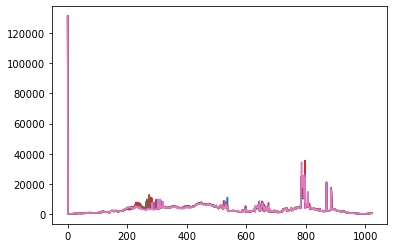

In [12]:
for k in np.arange(0,43,7):
    print(k)
    plot(fd['vis'][:][k,:,0].real)

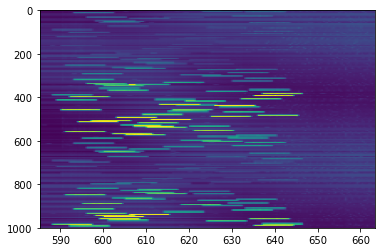

In [31]:
## Annies's GPS RTK Signal RFI Measurement?
## Test) cross-pol stuff, homing over dish
gaindir='/media/wvurail/ssd_a/TONE_ACQ/digital_gains/20211020T210151Z_yale_drone_yale_digitalgain/'
datadir='/media/wvurail/ssd_a/TONE_ACQ/20211020T210151Z_yale_drone/corr/20211020T210203Z/'
#annieRTK=Corr_Data(n_channels=2,chmap=GBO8_chmap,Data_Directory=datadir,Working_Directory='/home/wvurail/',Gain_Directory=gaindir)


imshow(annieRTK.V_full[12800:13000:1,550:350:-1,0],extent=[annieRTK.freq[550],annieRTK.freq[350],1000,0],aspect='auto')
#plot(annieRTK.freq,np.nanmax(annieRTK.V_full[12000:13300,:,0],axis=0))
#plot(annieRTK.freq,np.nanmax(annieRTK.V_full[12000:13300,:,1],axis=0))
#semilogy(annieRTK.V_full[6000:8000,300,:],'.')
#annieRTK.freq[300]

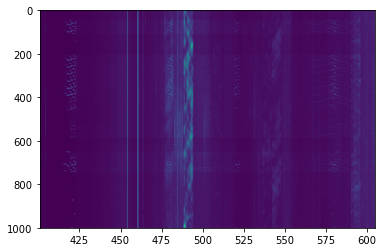

In [29]:
## Test 1) first test acquisition, just a sky measurement, then plugging in RTK: BADNESS at 750MHz as seen on SpecAn
gaindir='/media/wvurail/ssd_a/TONE_ACQ/digital_gains/20211021T123840Z_yale_drone_yale_digitalgain//'
datadir='/media/wvurail/ssd_a/TONE_ACQ/20211021T123840Z_yale_drone/corr/20211021T123853Z/'
#DJIRTKRFI=Corr_Data(n_channels=2,chmap=GBO8_chmap,Data_Directory=datadir,Working_Directory='/home/wvurail/',Gain_Directory=gaindir)
imshow(DJIRTKRFI.V_full[3000:3300:1,-1:500:-1,0],extent=[DJIRTKRFI.freq[-1],DJIRTKRFI.freq[500],1000,0],aspect='auto')

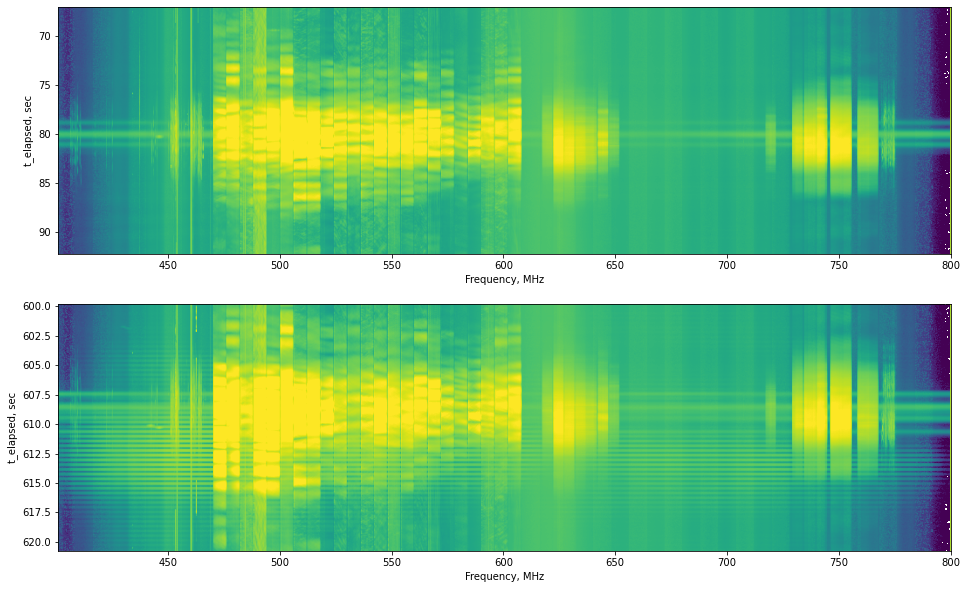

In [41]:
# Flight 8) grid flight, isolating repeating RFI feature:
gaindir='/media/wvurail/ssd_b/TONE_ACQ/digital_gains/20211021T192212Z_yale_drone_yale_digitalgain/'
datadir='/media/wvurail/ssd_b/TONE_ACQ/20211021T192212Z_yale_drone/corr/20211021T192225Z/'
#f8RFI=Corr_Data(n_channels=4,chmap=GBO8_chmap,Data_Directory=datadir,Working_Directory='/home/wvurail/',Gain_Directory=gaindir)

t_elapsed=np.array([(k-f8RFI.t_arr_datetime[0]).total_seconds() for k in f8RFI.t_arr_datetime[:]])

fig=figure(figsize=(16,10))
ax1=fig.add_subplot(211)
ax1.imshow(f8RFI.V_full[1600:2200,::-1,0],extent=[f8RFI.freq[-1],f8RFI.freq[0],t_elapsed[2200],t_elapsed[1600]],norm=LogNorm(),cm='gnuplot2',aspect='auto')
ax2=fig.add_subplot(212)
ax2.imshow(f8RFI.V_full[14300:14800,::-1,0],extent=[f8RFI.freq[-1],f8RFI.freq[0],t_elapsed[14800],t_elapsed[14300]],norm=LogNorm(),aspect='auto')
for ax in [ax1,ax2]:
    ax.set_xlabel("Frequency, MHz")
    ax.set_ylabel("t_elapsed, sec")
    

#f8RFI.Plot_Auto_Corr_Time_Series(tbounds=[1600,2200],freqlist=[200,400,650,800])
#f8RFI.Plot_Auto_Corr_Time_Series(tbounds=[14300,14800],freqlist=[200,400,650,800])



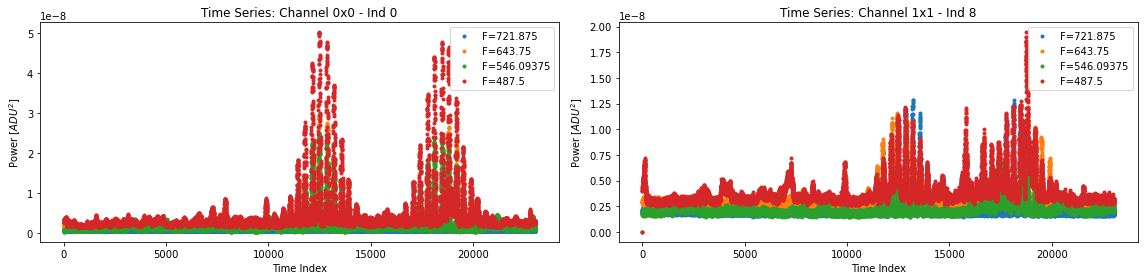

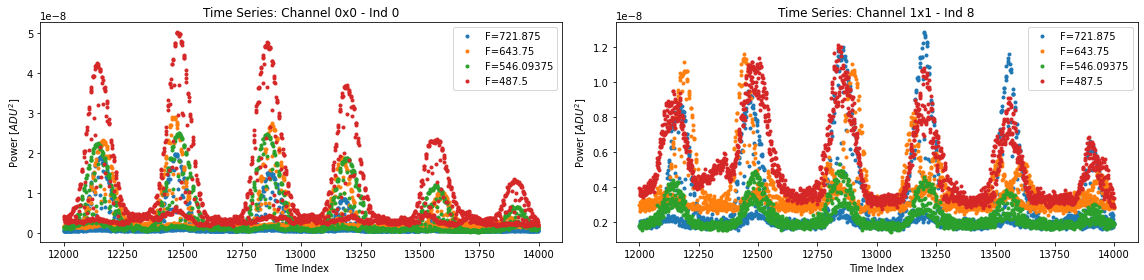

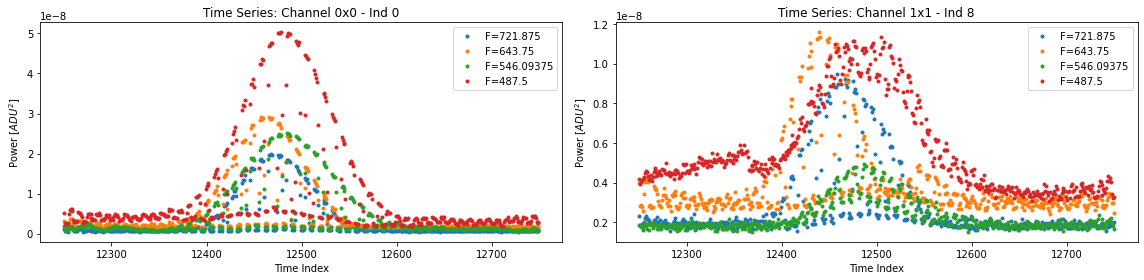

In [41]:
## Friday Flight 1: Crosspol feature?
## Flight 1) - [ssd_a 3] - first test acquisition, just a sky measurement, maybe a crosspol dip?
gaindir='/media/wvurail/ssd_a/TONE_ACQ/digital_gains/20211022T122457Z_yale_drone_yale_digitalgain/'
datadir='/media/wvurail/ssd_a/TONE_ACQ/20211022T122457Z_yale_drone/corr/20211022T122539Z/'
#xpolf1=Corr_Data(n_channels=2,chmap=GBO8_chmap,Data_Directory=datadir,Working_Directory='/home/wvurail/',Gain_Directory=gaindir)
xpolf1.Plot_Auto_Corr_Time_Series(tbounds=[0,-1],freqlist=[200,400,650,800])
xpolf1.Plot_Auto_Corr_Time_Series(tbounds=[12000,14000],freqlist=[200,400,650,800])
xpolf1.Plot_Auto_Corr_Time_Series(tbounds=[12250,12750],freqlist=[200,400,650,800])

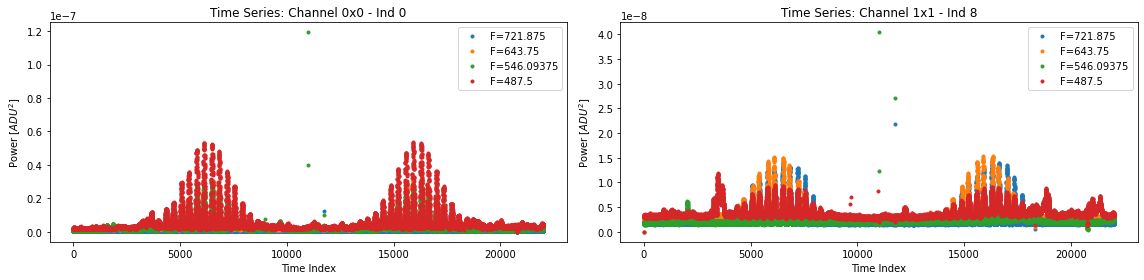

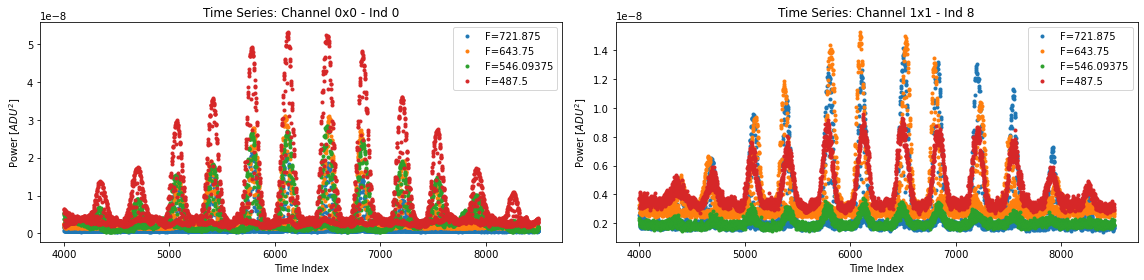

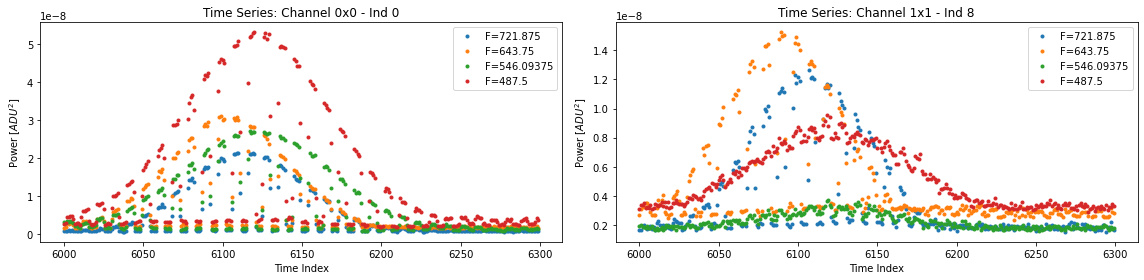

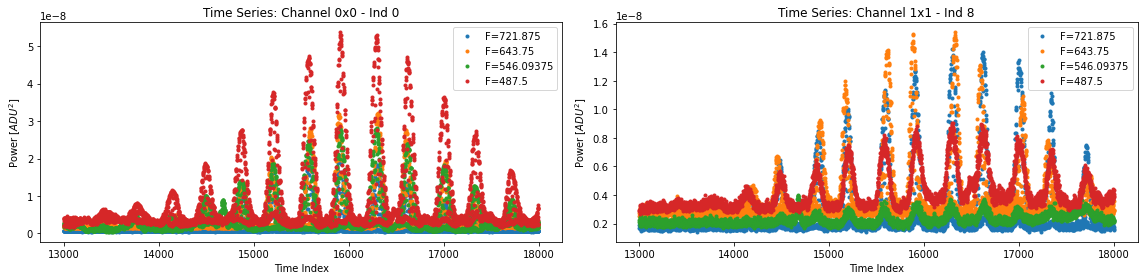

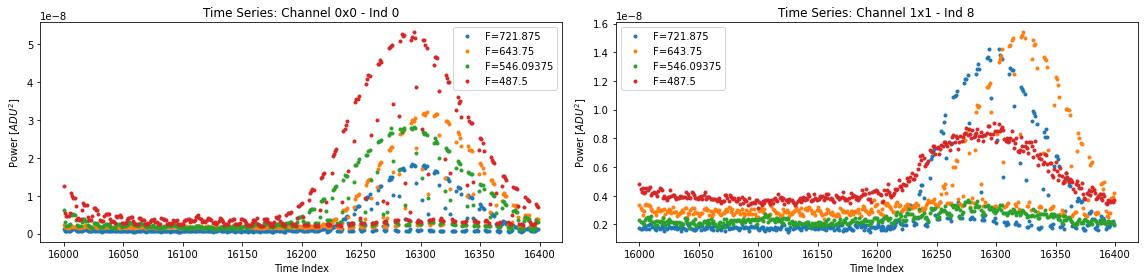

In [55]:
## Friday crosspol 2:
## Flight 2) - [ssd_a 4] - first test acquisition, just a sky measurement, maybe a crosspol dip?
gaindir='/media/wvurail/ssd_a/TONE_ACQ/digital_gains/20211022T125439Z_yale_drone_yale_digitalgain/'
datadir='/media/wvurail/ssd_a/TONE_ACQ/20211022T125439Z_yale_drone/corr/20211022T125451Z/'
#test=Corr_Data(n_channels=2,chmap=GBO8_chmap,Data_Directory=datadir,Working_Directory='/home/wvurail/',Gain_Directory=gaindir)
test.Plot_Auto_Corr_Time_Series(tbounds=[0,-1],freqlist=[200,400,650,800])
test.Plot_Auto_Corr_Time_Series(tbounds=[4000,8500],freqlist=[200,400,650,800])
test.Plot_Auto_Corr_Time_Series(tbounds=[6000,6300],freqlist=[200,400,650,800])
test.Plot_Auto_Corr_Time_Series(tbounds=[13000,18000],freqlist=[200,400,650,800])
test.Plot_Auto_Corr_Time_Series(tbounds=[16000,16400],freqlist=[200,400,650,800])

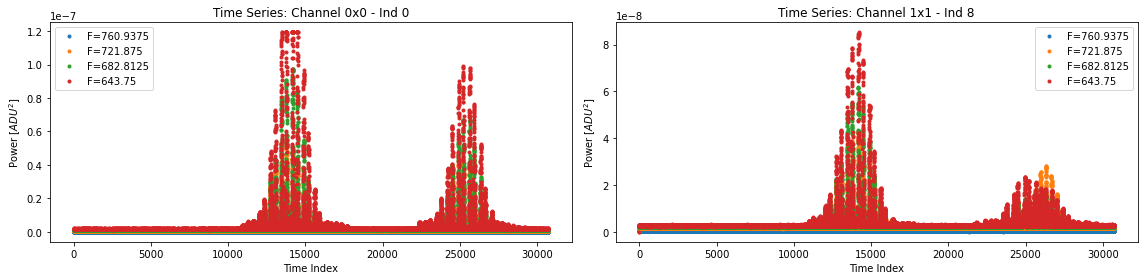

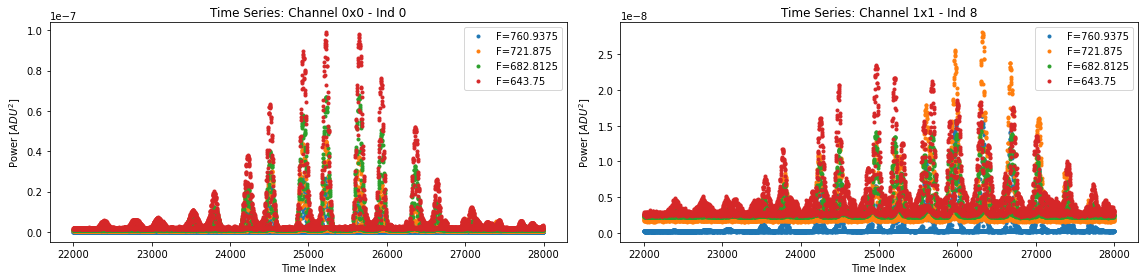

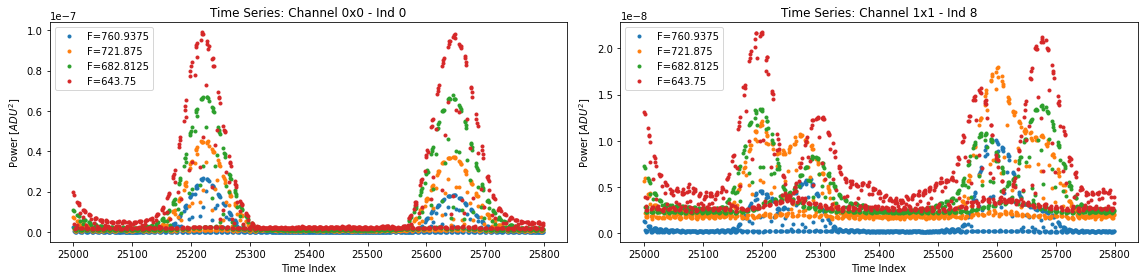

In [69]:
## Flight 3) - [ssd_a 5] - flying crosspol at 30dB atten --> definite crosspol dip in bottom plot:
gaindir='/media/wvurail/ssd_a/TONE_ACQ/digital_gains/20211022T133015Z_yale_drone_yale_digitalgain/'
datadir='/media/wvurail/ssd_a/TONE_ACQ/20211022T133015Z_yale_drone/corr/20211022T133027Z/'
#test=Corr_Data(n_channels=2,chmap=GBO8_chmap,Data_Directory=datadir,Working_Directory='/home/wvurail/',Gain_Directory=gaindir)
test.Plot_Auto_Corr_Time_Series(tbounds=[0,-1],freqlist=[100,200,300,400])
#test.Plot_Auto_Corr_Time_Series(tbounds=[10000,16000],freqlist=[200,400,650,800])
#test.Plot_Auto_Corr_Time_Series(tbounds=[13700,14300],freqlist=[200,400,650,800])
test.Plot_Auto_Corr_Time_Series(tbounds=[22000,28000],freqlist=[100,200,300,400])
test.Plot_Auto_Corr_Time_Series(tbounds=[25000,25800],freqlist=[100,200,300,400])

In [ ]:
## Flight 5) - [ssd_a 7] - flying crosspol at 30dB atten: JET FIGHTER RFI??? not much evidence of crosspol dips?
gaindir='/media/wvurail/ssd_a/TONE_ACQ/digital_gains/20211022T142848Z_yale_drone_yale_digitalgain/'
datadir='/media/wvurail/ssd_a/TONE_ACQ/20211022T142848Z_yale_drone/corr/20211022T142900Z/'
#test=Corr_Data(n_channels=2,chmap=GBO8_chmap,Data_Directory=datadir,Working_Directory='/home/wvurail/',Gain_Directory=gaindir)
## Crosspol Features:
test.Plot_Auto_Corr_Time_Series(tbounds=[9000,10800],freqlist=[450])
test.Plot_Auto_Corr_Time_Series(tbounds=[9000,10800],freqlist=[500])
test.Plot_Auto_Corr_Time_Series(tbounds=[9000,10800],freqlist=[550])